In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_excel("marks_data.xlsx")

In [3]:
df.head()

,STD_ID,Math,Science
0,1,52,82
1,2,53,86
2,3,75,88
3,4,75,76
4,5,59,92


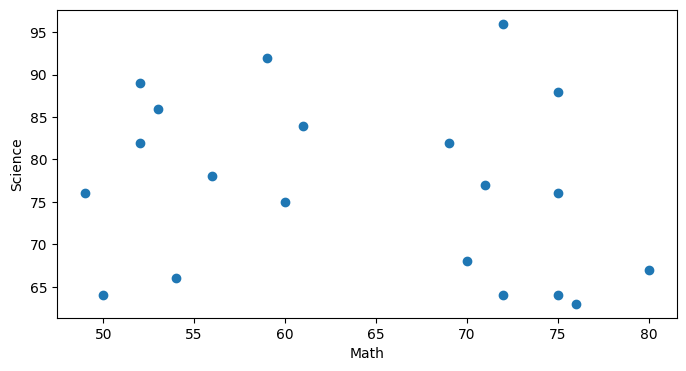

In [6]:
plt.figure(figsize=(8,4))
plt.scatter(df['Math'], df['Science'])
plt.xlabel("Math")
plt.ylabel("Science")
plt.show()

In [7]:
k=2
c1= np.random.randint(40,99,2)
c2= np.random.randint(40,99,2)
c1,c2

(array([78, 52], dtype=int32), array([69, 85], dtype=int32))

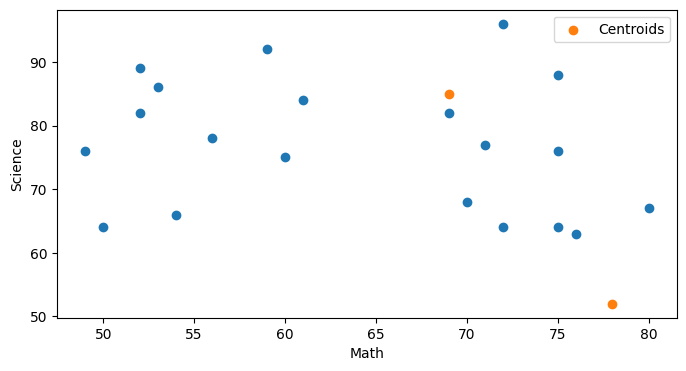

In [10]:
plt.figure(figsize=(8,4))
plt.scatter(df['Math'], df['Science'])
plt.scatter([c1[0], c2[0]],[c1[1], c2[1]], label="Centroids")
plt.legend()
plt.xlabel("Math")
plt.ylabel("Science")
plt.show()

In [12]:
dist_c1= np.sqrt(np.square(c1[0]- df["Math"])+ np.square(c1[1]-df["Science"]))
dist_c1

0     39.698866
1     42.201896
2     36.124784
3     24.186773
4     44.283180
5     30.463092
6     37.643060
7     11.180340
8     12.369317
9     27.784888
10    13.416408
11    25.961510
12    45.221676
13    34.058773
14    36.235342
15    29.206164
16    31.320920
17    44.407207
18    15.132746
19    17.888544
dtype: float64

In [13]:
dist_c2= np.sqrt(np.square(c2[0]- df["Math"])+ np.square(c2[1]-df["Science"]))
dist_c2

0     17.262677
1     16.031220
2      6.708204
3     10.816654
4     12.206556
5     28.319605
6     21.931712
7     23.086793
8     21.840330
9     24.207437
10    21.213203
11     8.246211
12    17.464249
13    14.764823
14     8.062258
15    13.453624
16     3.000000
17    11.401754
18    21.095023
19    17.029386
dtype: float64

In [14]:
df["Cluster1"]=dist_c1
df["Cluster2"]=dist_c2

In [15]:
df

,STD_ID,Math,Science,Cluster1,Cluster2
0,1,52,82,39.698866,17.262677
1,2,53,86,42.201896,16.031220
2,3,75,88,36.124784,6.708204
3,4,75,76,24.186773,10.816654
4,5,59,92,44.283180,12.206556
5,6,50,64,30.463092,28.319605
6,7,49,76,37.643060,21.931712
7,8,76,63,11.180340,23.086793
8,9,75,64,12.369317,21.840330
9,10,54,66,27.784888,24.207437


In [18]:
classes= list(map(lambda x: 0 if x[0]<x[1] else 1, zip(df["Cluster1"], df["Cluster2"])))

In [19]:
classes

[1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1]

In [20]:
df["classes"]= classes
df

,STD_ID,Math,Science,Cluster1,Cluster2,classes
0,1,52,82,39.698866,17.262677,1
1,2,53,86,42.201896,16.031220,1
2,3,75,88,36.124784,6.708204,1
3,4,75,76,24.186773,10.816654,1
4,5,59,92,44.283180,12.206556,1
5,6,50,64,30.463092,28.319605,1
6,7,49,76,37.643060,21.931712,1
7,8,76,63,11.180340,23.086793,0
8,9,75,64,12.369317,21.840330,0
9,10,54,66,27.784888,24.207437,1


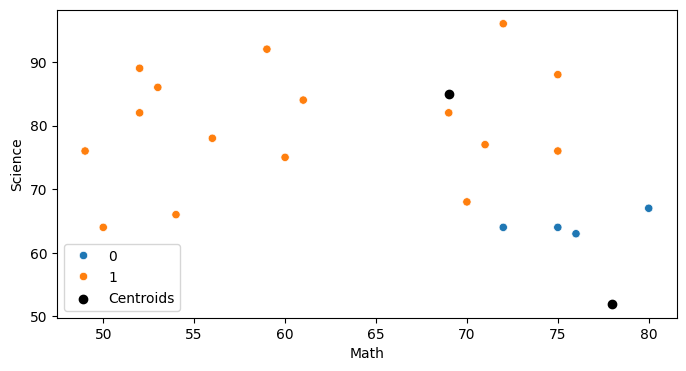

In [21]:
plt.figure(figsize=(8,4))
sns.scatterplot(df, x="Math", y="Science", hue="classes")
plt.scatter([c1[0], c2[0]],[c1[1], c2[1]], label="Centroids", color="black")
plt.legend()
plt.xlabel("Math")
plt.ylabel("Science")
plt.show()

In [24]:
c1= df[df["classes"]==0][["Math","Science"]].mean()

In [25]:
c2= df[df["classes"]==1][["Math","Science"]].mean()

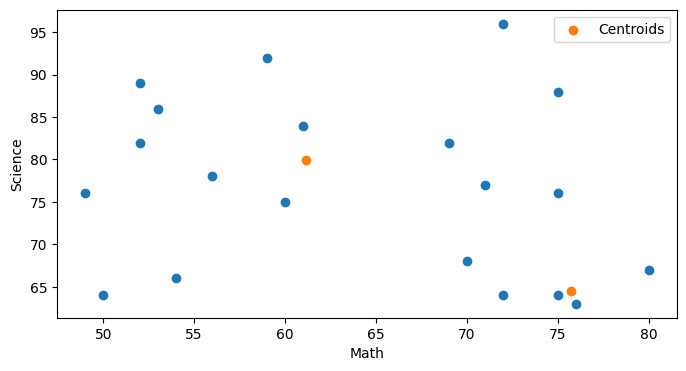

In [26]:
plt.figure(figsize=(8,4))
plt.scatter(df['Math'], df['Science'])
plt.scatter([c1[0], c2[0]],[c1[1], c2[1]], label="Centroids")
plt.legend()
plt.xlabel("Math")
plt.ylabel("Science")
plt.show()

In [27]:
dist_c1= np.sqrt(np.square(c1[0]- df["Math"])+ np.square(c1[1]-df["Science"]))
dist_c2= np.sqrt(np.square(c2[0]- df["Math"])+ np.square(c2[1]-df["Science"]))
df["Cluster1"]=dist_c1
df["Cluster2"]=dist_c2
classes= list(map(lambda x: 0 if x[0]<x[1] else 1, zip(df["Cluster1"], df["Cluster2"])))
df["classes"]= classes

In [28]:
df

,STD_ID,Math,Science,Cluster1,Cluster2,classes
0,1,52,82,29.501059,9.355187,1
1,2,53,86,31.301957,10.137531,1
2,3,75,88,23.511965,16.047415,1
3,4,75,76,11.524431,14.422882,0
4,5,59,92,32.199573,12.248246,1
5,6,50,64,25.754854,19.436294,1
6,7,49,76,29.117220,12.748315,1
7,8,76,63,1.520691,22.542061,0
8,9,75,64,0.901388,21.131009,0
9,10,54,66,21.801663,15.653100,1


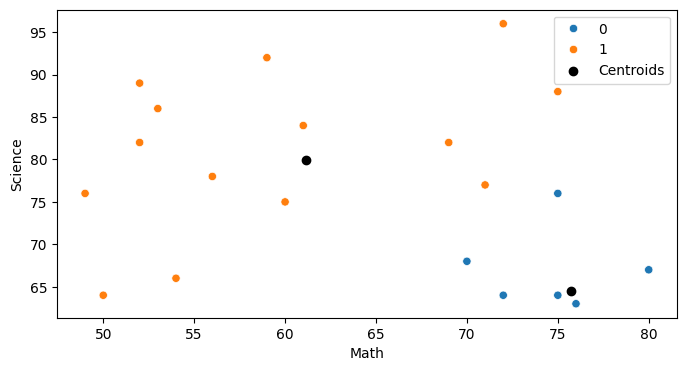

In [29]:
plt.figure(figsize=(8,4))
sns.scatterplot(df, x="Math", y="Science", hue="classes")
plt.scatter([c1[0], c2[0]],[c1[1], c2[1]], label="Centroids", color="black")
plt.legend()
plt.xlabel("Math")
plt.ylabel("Science")
plt.show()

In [30]:
c1= df[df["classes"]==0][["Math","Science"]].mean()
c2= df[df["classes"]==1][["Math","Science"]].mean()

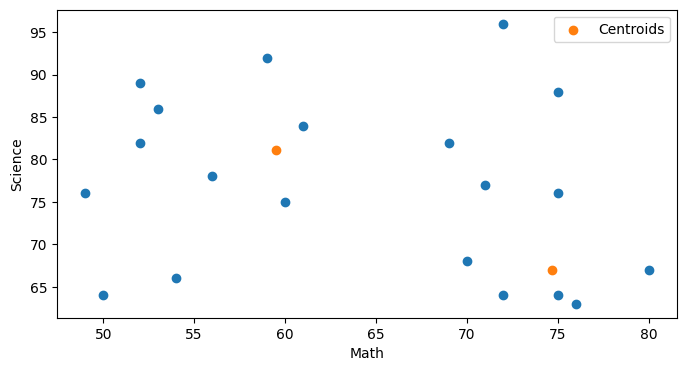

In [31]:
plt.figure(figsize=(8,4))
plt.scatter(df['Math'], df['Science'])
plt.scatter([c1[0], c2[0]],[c1[1], c2[1]], label="Centroids")
plt.legend()
plt.xlabel("Math")
plt.ylabel("Science")
plt.show()

In [32]:
dist_c1= np.sqrt(np.square(c1[0]- df["Math"])+ np.square(c1[1]-df["Science"]))
dist_c2= np.sqrt(np.square(c2[0]- df["Math"])+ np.square(c2[1]-df["Science"]))
df["Cluster1"]=dist_c1
df["Cluster2"]=dist_c2
classes= list(map(lambda x: 0 if x[0]<x[1] else 1, zip(df["Cluster1"], df["Cluster2"])))
df["classes"]= classes

In [33]:
df

,STD_ID,Math,Science,Cluster1,Cluster2,classes
0,1,52,82,27.180467,7.557264,1
1,2,53,86,28.817433,8.157255,1
2,3,75,88,21.002645,16.978077,1
3,4,75,76,9.006171,16.308568,0
4,5,59,92,29.503295,10.940003,1
5,6,50,64,24.848429,19.536726,1
6,7,49,76,27.198856,11.660591,1
7,8,76,63,4.216370,24.470932,0
8,9,75,64,3.018462,23.058267,0
9,10,54,66,20.690846,16.043627,1


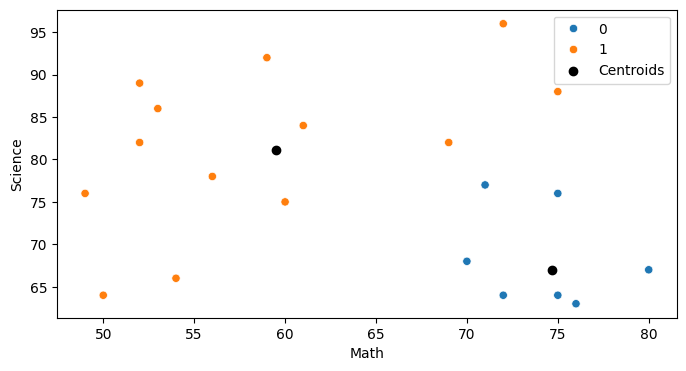

In [34]:
plt.figure(figsize=(8,4))
sns.scatterplot(df, x="Math", y="Science", hue="classes")
plt.scatter([c1[0], c2[0]],[c1[1], c2[1]], label="Centroids", color="black")
plt.legend()
plt.xlabel("Math")
plt.ylabel("Science")
plt.show()

In [35]:
c1= df[df["classes"]==0][["Math","Science"]].mean()
c2= df[df["classes"]==1][["Math","Science"]].mean()

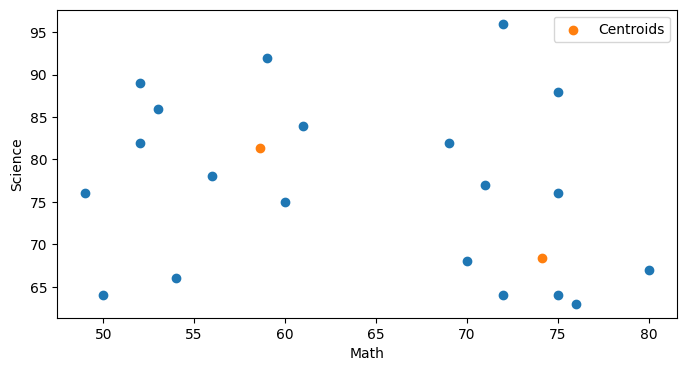

In [36]:
plt.figure(figsize=(8,4))
plt.scatter(df['Math'], df['Science'])
plt.scatter([c1[0], c2[0]],[c1[1], c2[1]], label="Centroids")
plt.legend()
plt.xlabel("Math")
plt.ylabel("Science")
plt.show()

In [37]:
dist_c1= np.sqrt(np.square(c1[0]- df["Math"])+ np.square(c1[1]-df["Science"]))
dist_c2= np.sqrt(np.square(c2[0]- df["Math"])+ np.square(c2[1]-df["Science"]))
df["Cluster1"]=dist_c1
df["Cluster2"]=dist_c2
classes= list(map(lambda x: 0 if x[0]<x[1] else 1, zip(df["Cluster1"], df["Cluster2"])))
df["classes"]= classes

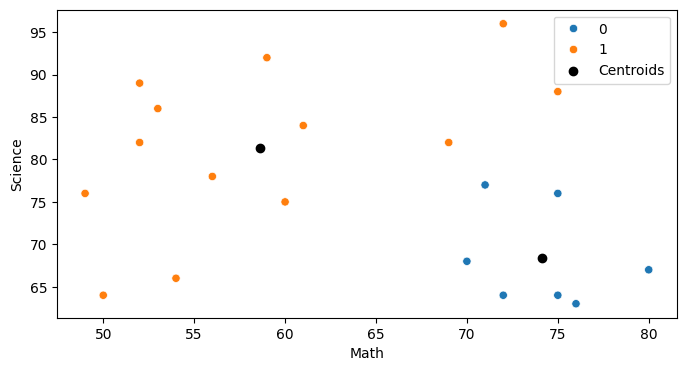

In [38]:
plt.figure(figsize=(8,4))
sns.scatterplot(df, x="Math", y="Science", hue="classes")
plt.scatter([c1[0], c2[0]],[c1[1], c2[1]], label="Centroids", color="black")
plt.legend()
plt.xlabel("Math")
plt.ylabel("Science")
plt.show()

In [39]:
c1= df[df["classes"]==0][["Math","Science"]].mean()
c2= df[df["classes"]==1][["Math","Science"]].mean()

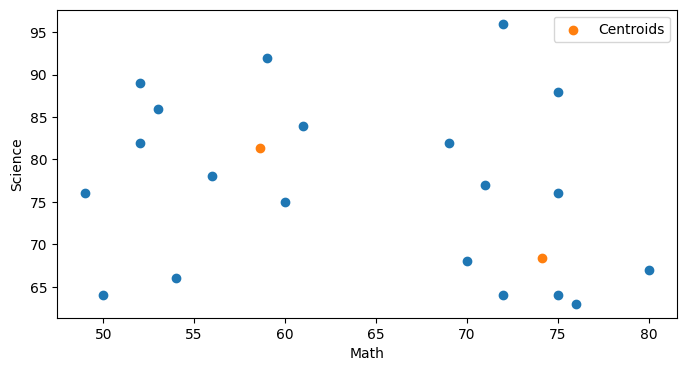

In [40]:
plt.figure(figsize=(8,4))
plt.scatter(df['Math'], df['Science'])
plt.scatter([c1[0], c2[0]],[c1[1], c2[1]], label="Centroids")
plt.legend()
plt.xlabel("Math")
plt.ylabel("Science")
plt.show()

In [41]:
dist_c1= np.sqrt(np.square(c1[0]- df["Math"])+ np.square(c1[1]-df["Science"]))
dist_c2= np.sqrt(np.square(c2[0]- df["Math"])+ np.square(c2[1]-df["Science"]))
df["Cluster1"]=dist_c1
df["Cluster2"]=dist_c2
classes= list(map(lambda x: 0 if x[0]<x[1] else 1, zip(df["Cluster1"], df["Cluster2"])))
df["classes"]= classes

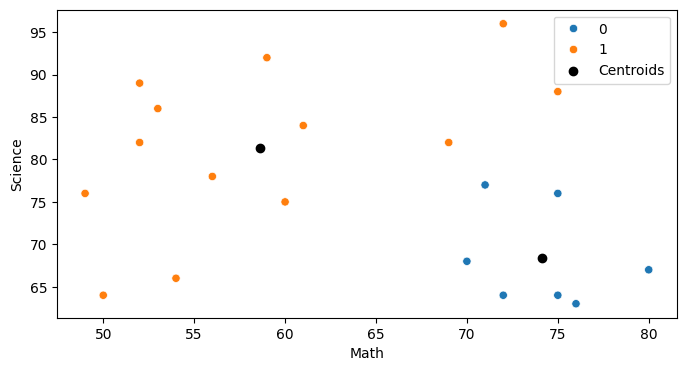

In [42]:
plt.figure(figsize=(8,4))
sns.scatterplot(df, x="Math", y="Science", hue="classes")
plt.scatter([c1[0], c2[0]],[c1[1], c2[1]], label="Centroids", color="black")
plt.legend()
plt.xlabel("Math")
plt.ylabel("Science")
plt.show()